
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь").**


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline


**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [2]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [3]:
data.head(5)
type(data)

pandas.core.frame.DataFrame

In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [5]:
data[(data['Embarked'] == 'C') & (data['Fare'] > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [6]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [7]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [8]:
age_categories = [age_category(age) for age in data.Age]
age_categories[:5]

[1, 2, 1, 2, 2]

In [9]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [10]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- **577 мужчин и 314 женщин**

In [11]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- **108**
- 112
- 125

In [12]:
print(data.groupby('Pclass')[['Sex']].count())
print(pd.crosstab(data['Pclass'], data['Sex']))


        Sex
Pclass     
1       216
2       184
3       491
Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- **Медиана – 14.45, стандартное отклонение – 49.69**
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [13]:
median = round(data['Fare'].median(), 2)
std = round(data['Fare'].std(), 2)
print(f"Медиана - {median}, стандартное отклонение - {std}")

Медиана - 14.45, стандартное отклонение - 49.69


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- **40.6% среди молодых и 22.7% среди старых**
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [14]:
young_mean = data[data['Age'] < 30]['Survived'].mean()
old_mean = data[data['Age'] > 60]['Survived'].mean()
print(f"{round(young_mean * 100, 1)}% среди молодых и {round(old_mean * 100, 1)}% среди старых")

40.6% среди молодых и 22.7% среди старых


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- **18.9% среди мужчин и 74.2% среди женщин**

In [15]:
male_mean = data[data["Sex"] == "male"]["Survived"].mean()
female_mean = data[data["Sex"] == "female"]["Survived"].mean()

print(f"{round(male_mean * 100, 1)}% среди мужчин и {round(female_mean * 100, 1)}% среди женщин")

18.9% среди мужчин и 74.2% среди женщин


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- **William**
- John

In [16]:
# За имя считается first name. Surname идёт до запятой, дальше идёт Mr. или Col. или Rev., 
# затем first name и middle name (при наличии)
male_names = data[data['Sex'] == 'male']['Name'].map(lambda name: name.split()[2])
male_names.value_counts().head(1)

William    35
Name: Name, dtype: int64

In [17]:
# Также я посчитала учитывая, что middle name также считается
male_names = data[data['Sex'] == 'male']['Name'].map(lambda name: name.split()[2:])
male_names = male_names.explode()
male_names.value_counts().head(1)

William    47
Name: Name, dtype: int64

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- **Да**
- Нет

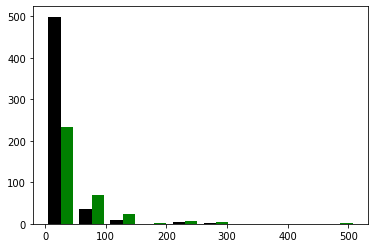

In [18]:
import matplotlib.pyplot as plt
from scipy import interpolate

survived = data[data['Survived'] == 1][['Fare', 'Age']]
died = data[data['Survived'] == 0][['Fare', 'Age']]

plt.hist([died['Fare'], survived['Fare']], color=['black', 'green'])
plt.show() # Чтобы вывелся только график

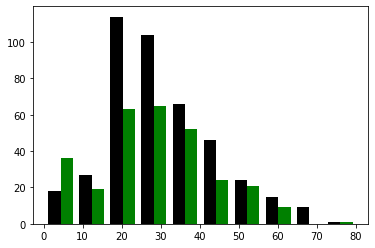

In [19]:
plt.hist([died['Age'], survived['Age']], color=['black', 'green'])
plt.show() # Чтобы вывелся только график

In [20]:
# Вроде по графику видно, что средний возраст выше, но ещё я это проверю
survived['Age'].mean(), \
died['Age'].mean()

(28.343689655172415, 30.62617924528302)

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- **В среднем мужчины 1-го класса старше 40 лет**
- В среднем женщины 1-го класса старше 40 лет
- **Мужчины всех классов в среднем старше женщин того же класса**
- **В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса**

In [21]:
data.groupby(['Pclass', 'Sex']).agg(np.nanmean)['Age']

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64